<a href="https://colab.research.google.com/github/Tomas-Ausensi/Entregables_MAT281/blob/master/docs/labs/lab_4_tom%C3%A1s_ausensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04



## Problema 01

<img src="https://drive.google.com/uc?export=view&id=1LkStfZqwS8AOm_xja6KDWWQMQV2ijrDu" width = "300" align="center"/>

EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(6,5)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_04/data/company_sales_data.csv")
df.head(10)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

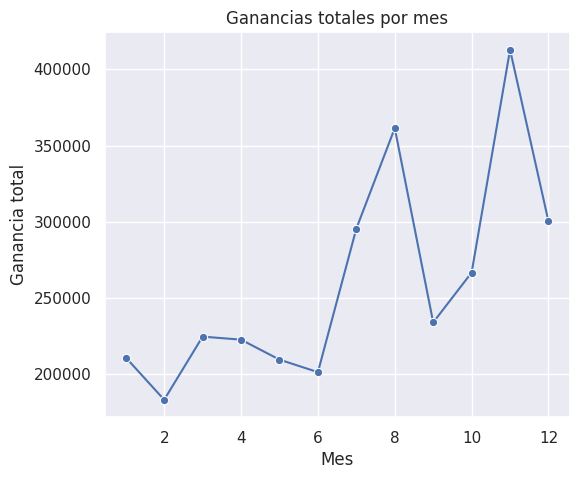

In [3]:
#gráfico de línea
sns.lineplot(
    x = 'month_number',
    y= 'total_profit',
    data = df,
    marker = 'o'
)
plt.ylabel('Ganancia total')
plt.xlabel('Mes')
plt.title('Ganancias totales por mes')
plt.show()

Podría considerar este gráfico importante, pues muestra, directamente, las ganancias totales de cada mes. Es información relevante

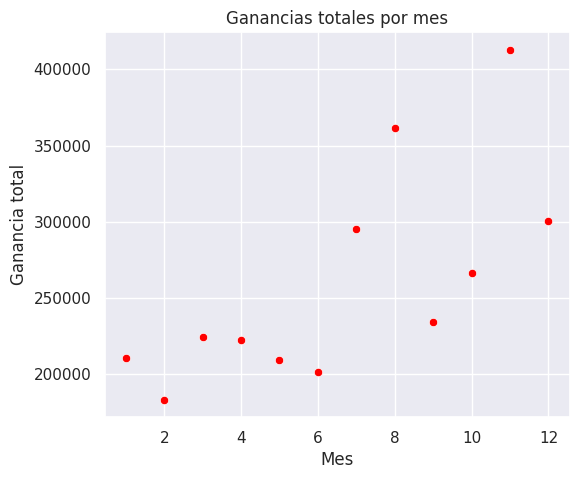

In [10]:
sns.scatterplot(
    x = 'month_number',
    y = 'total_profit',
    data= df,
    color = 'red'
)
plt.ylabel('Ganancia total')
plt.xlabel('Mes')
plt.title('Ganancias totales por mes')
plt.show()

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

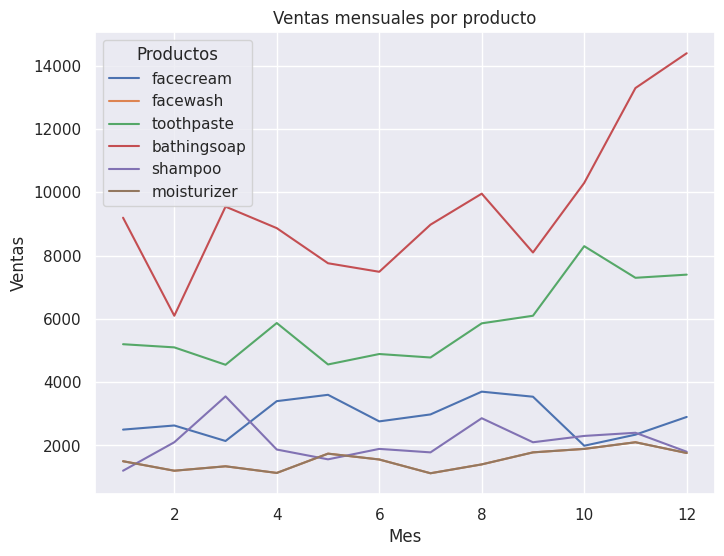

In [11]:
#Reordenamiento para dejar los productos en una sola columna, para
#ocupar Seaborn 'hue'
product_values = df.drop(columns = ['total_units', 'total_profit'])
product_values = product_values.melt(id_vars = ['month_number'], var_name = 'Productos', value_name = 'Ventas')

plt.figure(figsize=(8,6))
sns.lineplot(
    x= 'month_number',
    y = 'Ventas',
    hue = 'Productos',
    data = product_values
)
plt.title('Ventas mensuales por producto')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()

Al igual que el primer gráfico, la importancia aquí radica ahora en en la visualización de las ventas **por producto**. De esa manera, se puede saber con mayor detalle que productos aportaron más o menos a las ganancias totales vistas en el primer gráfico.

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

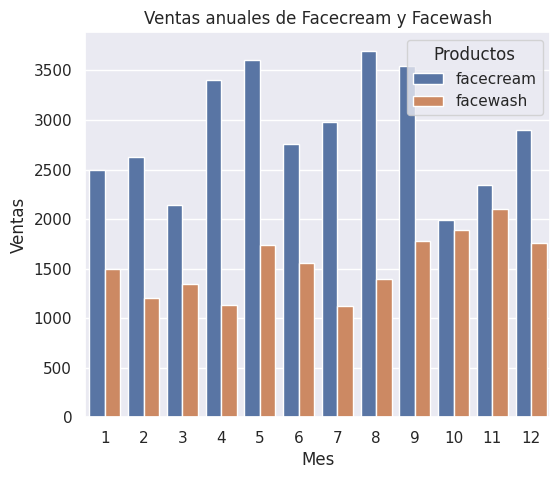

In [12]:
#filtrado por productos
product_values2 = product_values.apply(lambda row : row[product_values['Productos'].isin(['facewash', 'facecream'])])

#Gráfico de barras
sns.barplot(
    x= 'month_number',
    y = 'Ventas',
    hue = 'Productos',
    data = product_values2
)
plt.ylabel('Ventas')
plt.xlabel('Mes')
plt.title('Ventas anuales de Facecream y Facewash')
plt.show()

Si se tratase de comparar dos productos (o más), esta visualización puede resultar útil, pues la escala es correcta y se puede apreciar directamente la comparativa entre las ganancias provenientes de los dos productos. De esa forma, si se tratase de tomar una decisión respecto a que producto mantener y cual desechar, este gráfico resulta de utilidad.

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

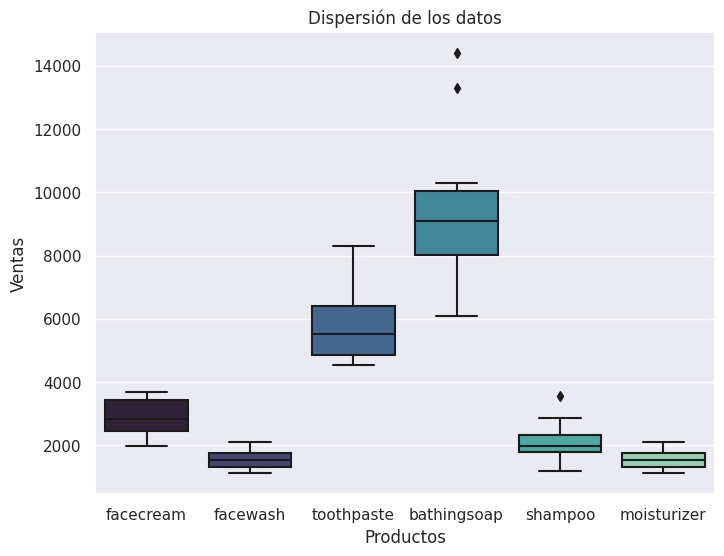

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df.drop(columns = ['month_number','total_units', 'total_profit']), palette = 'mako')
plt.title('Dispersión de los datos')
plt.ylabel('Ventas')
plt.xlabel('Productos')
plt.show()

Este gráfico puede resultar interesante para dar una idea de como se distribuyen los datos respecto a cada producto.

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

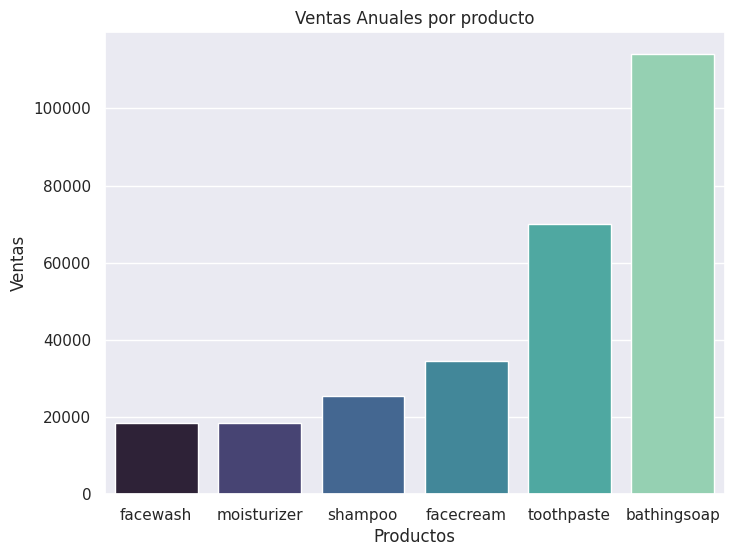

In [16]:
ventas_totales = product_values.groupby('Productos').agg(sum).drop(columns = ['month_number']).reset_index().sort_values(by='Ventas')
plt.figure(figsize=(8,6))
sns.barplot(
    x= 'Productos',
    y = 'Ventas',
    data = ventas_totales,
    palette = 'mako'
)
plt.title('Ventas Anuales por producto')
plt.show()

Se puede apreciar, claramente, cuales son los productos que más ganancias aportan a la empresa. Puede resultar útil este gráfico para realizar un diagnóstico en cuanto a la viabilidad de los productos.

**Nota**: el profesor nos indicó que usáramos un gráfico de barras en vez de uno circular.